In [2]:
import pandas as pd
file_path = 'C:\\Users\\ssing\\OneDrive\\Desktop\\archive\\Healthcare-Diabetes.csv'  # Replace with the actual path to your dataset
diabetes_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to check its structure
diabetes_data.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


C:\Users\ssing\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ssing\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


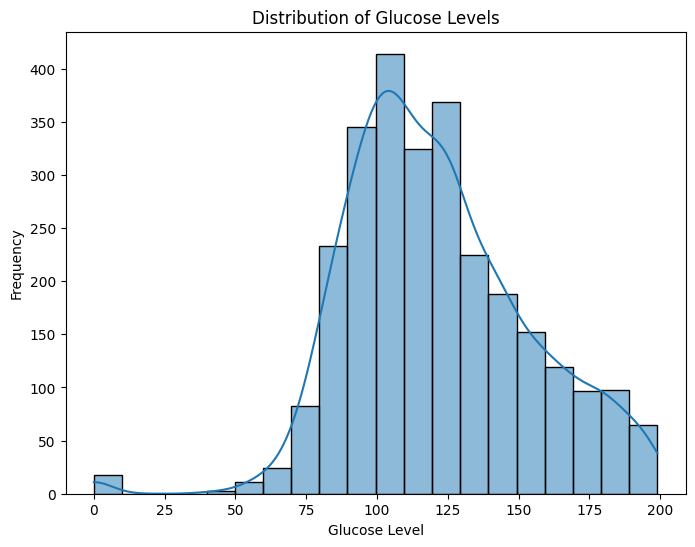

In [5]:
# Check for missing values
missing_values = diabetes_data.isnull().sum()

# Handle missing values (if any)
# Example: diabetes_data['column_name'].fillna(value, inplace=True)

# Explore data distributions and correlations
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualize the distribution of glucose levels
plt.figure(figsize=(8, 6))
sns.histplot(diabetes_data['Glucose'], bins=20, kde=True)
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose Levels')
plt.show()

# Split the dataset into features (X) and target (y)
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)








LogisticRegression(max_iter=1000)

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Train the model on the scaled data
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


    










Accuracy: 0.34
              precision    recall  f1-score   support

           0       0.57      0.02      0.04       367
           1       0.34      0.97      0.50       187

    accuracy                           0.34       554
   macro avg       0.45      0.49      0.27       554
weighted avg       0.49      0.34      0.20       554

ROC-AUC Score: 0.57
Confusion Matrix:
[[  8 359]
 [  6 181]]


C:\Users\ssing\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\ssing\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [15]:
# Get feature coefficients
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_[0]})
print('Feature Coefficients:')
print(feature_importance)

Feature Coefficients:
                    Feature  Coefficient
0                        Id    -0.037567
1               Pregnancies     0.431421
2                   Glucose     1.131487
3             BloodPressure    -0.235833
4             SkinThickness    -0.010747
5                   Insulin    -0.166332
6                       BMI     0.697247
7  DiabetesPedigreeFunction     0.285180
8                       Age     0.121156
